# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [15]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from gan.train import train
from gan.utils import sample_noise, show_images, deprocess_img, preprocess_img
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw



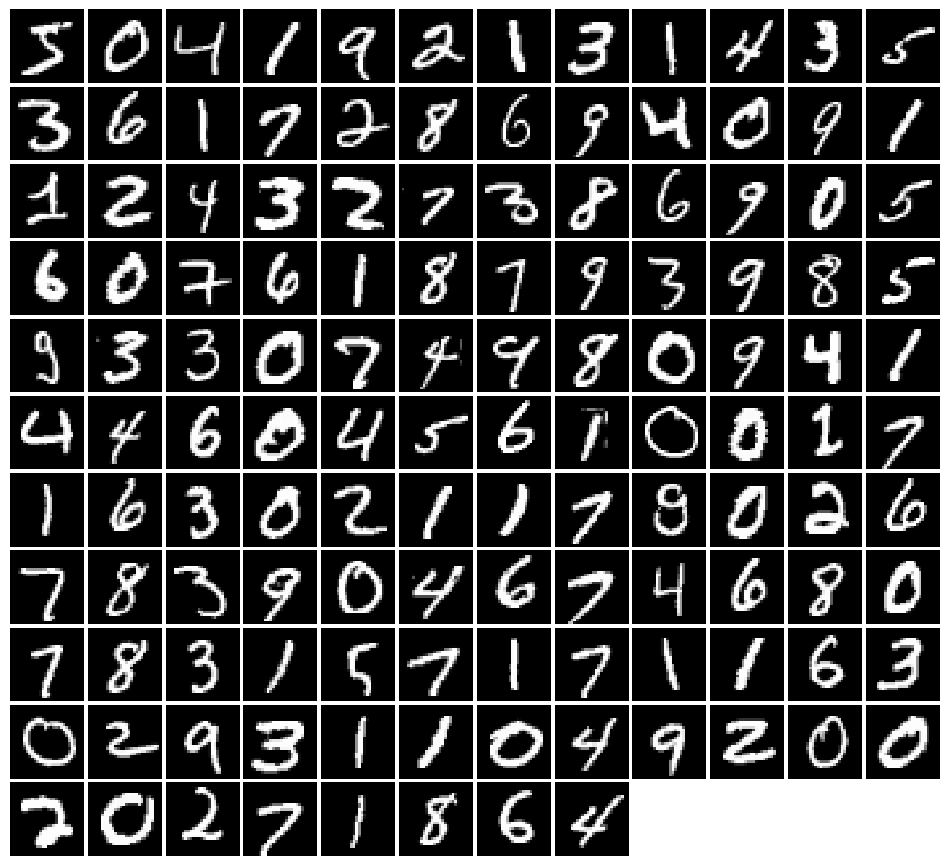

In [4]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)


imgs = next(loader_train.__iter__())[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

# Discriminator and Generator


In [18]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [19]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [20]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="gan_samples/mnist.jpg" width=500>

EPOCH:  1
Iter: 0, D: 1.339, G:0.6744


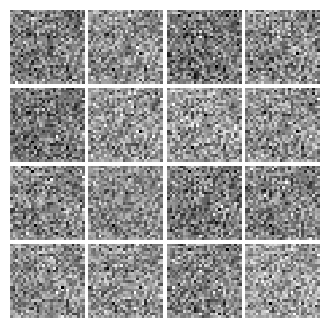


Iter: 250, D: 0.9102, G:1.224


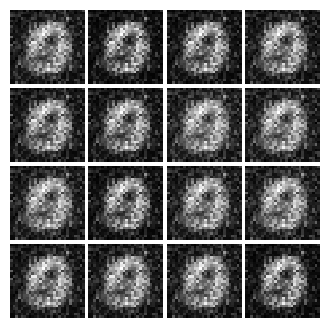


EPOCH:  2
Iter: 500, D: 1.528, G:1.437


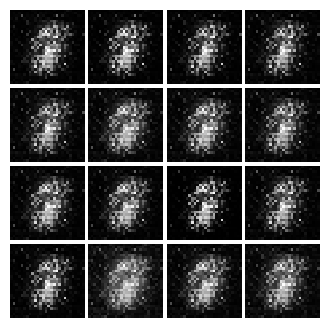


Iter: 750, D: 1.227, G:1.836


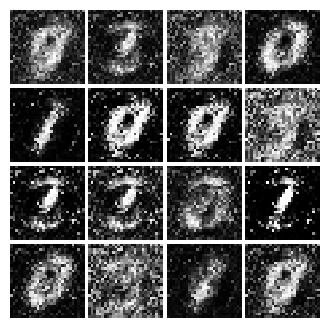


EPOCH:  3
Iter: 1000, D: 1.26, G:0.8551


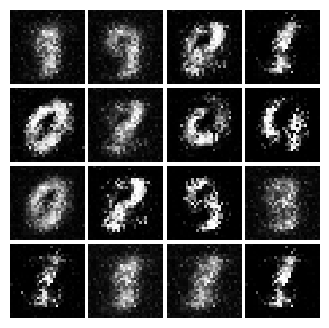


Iter: 1250, D: 1.153, G:1.036


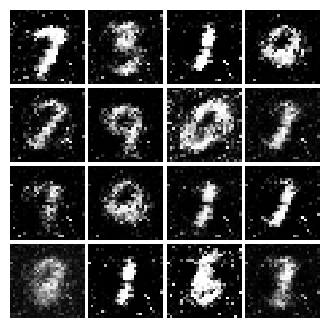


EPOCH:  4
Iter: 1500, D: 1.135, G:1.634


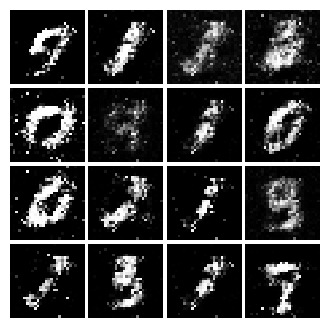


Iter: 1750, D: 1.295, G:0.8967


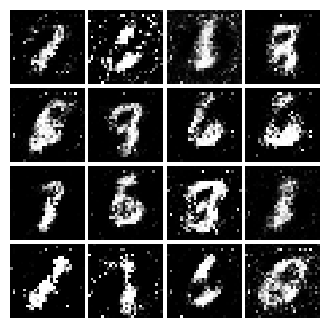


EPOCH:  5
Iter: 2000, D: 1.205, G:0.8637


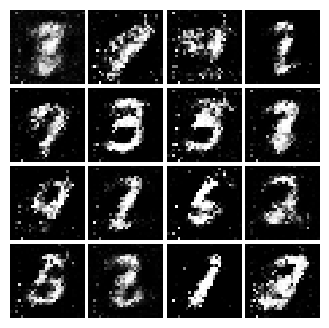


Iter: 2250, D: 1.357, G:0.9561


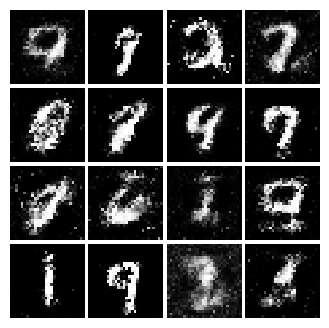


EPOCH:  6
Iter: 2500, D: 1.26, G:0.8453


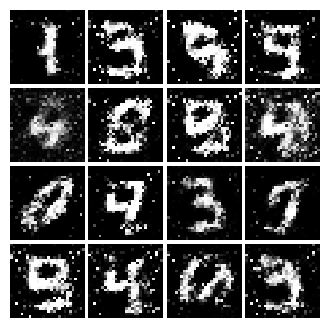


Iter: 2750, D: 1.277, G:0.9276


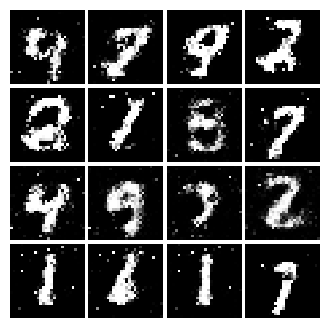


EPOCH:  7
Iter: 3000, D: 1.349, G:0.8617


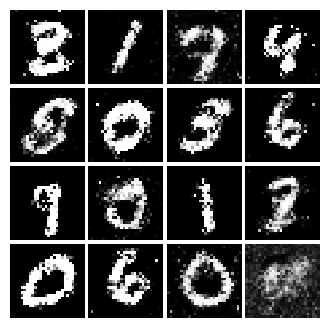


Iter: 3250, D: 1.252, G:0.8817


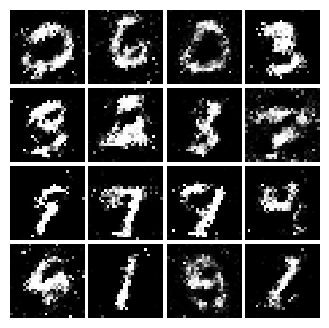


EPOCH:  8
Iter: 3500, D: 1.318, G:0.8438


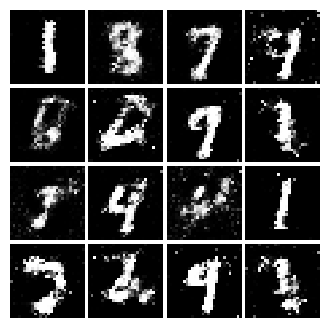


EPOCH:  9
Iter: 3750, D: 1.312, G:0.8396


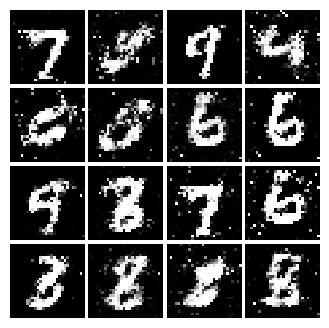


Iter: 4000, D: 1.405, G:0.8087


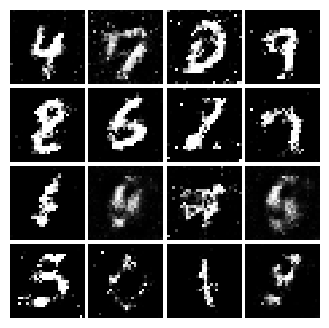


EPOCH:  10
Iter: 4250, D: 1.29, G:0.7605


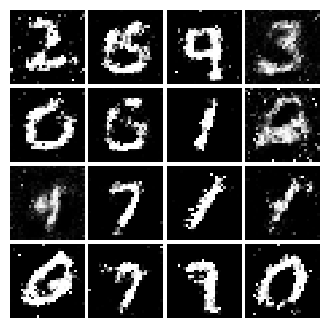


Iter: 4500, D: 1.432, G:0.809


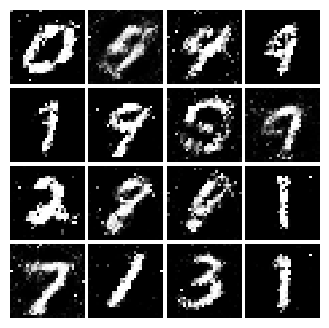

In [23]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: 0.5463, G:0.5147


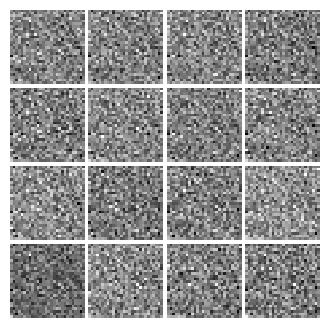


Iter: 250, D: 0.133, G:0.2963


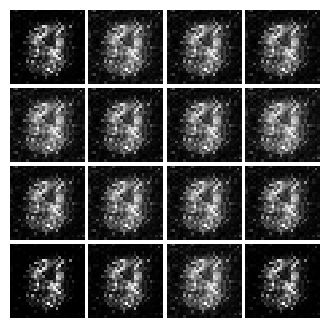


EPOCH:  2
Iter: 500, D: 0.1715, G:0.3826


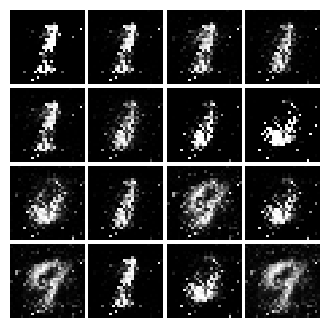


Iter: 750, D: 0.121, G:0.3498


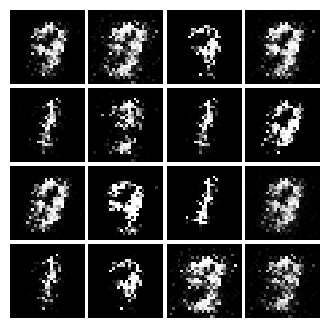


EPOCH:  3
Iter: 1000, D: 0.1732, G:0.2144


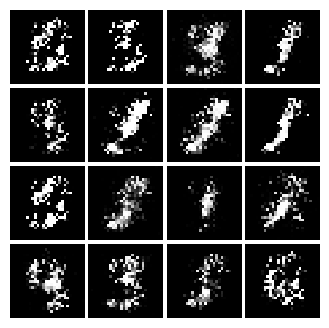


Iter: 1250, D: 0.1467, G:0.2313


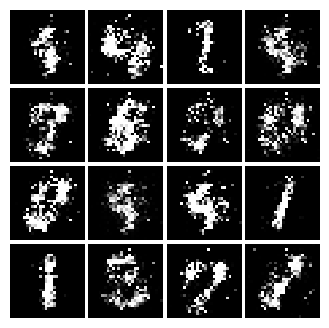


EPOCH:  4
Iter: 1500, D: 0.1792, G:0.2016


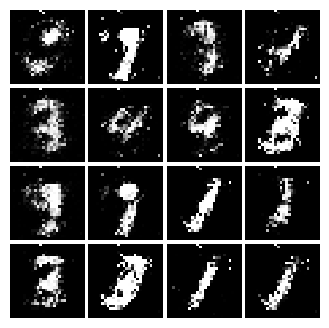


Iter: 1750, D: 0.2462, G:0.35


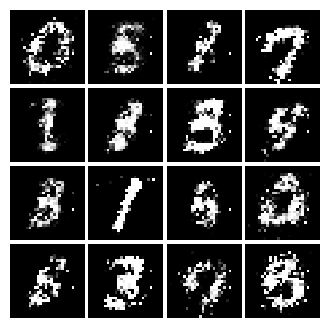


EPOCH:  5
Iter: 2000, D: 0.2013, G:0.2453


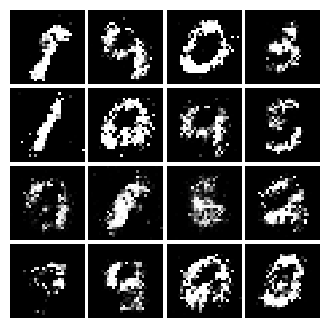


Iter: 2250, D: 0.2095, G:0.2019


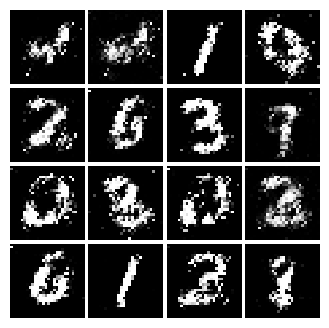


EPOCH:  6
Iter: 2500, D: 0.2512, G:0.1816


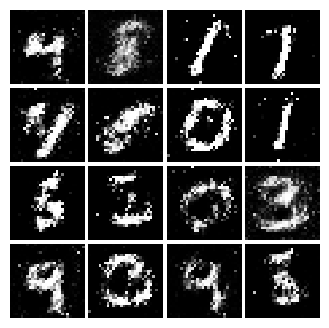


Iter: 2750, D: 0.2184, G:0.1937


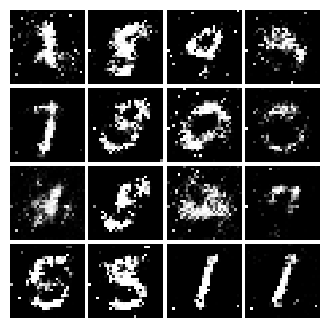


EPOCH:  7
Iter: 3000, D: 0.1972, G:0.1627


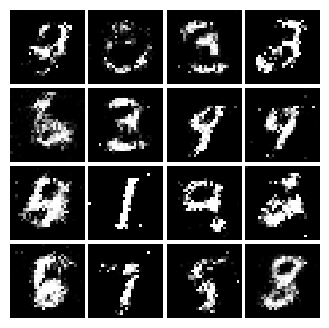


Iter: 3250, D: 0.2006, G:0.1683


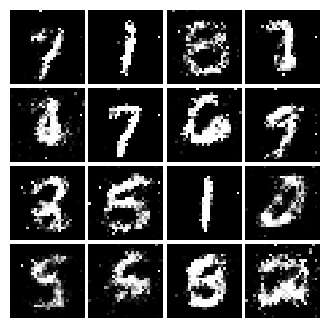


EPOCH:  8
Iter: 3500, D: 0.2262, G:0.1726


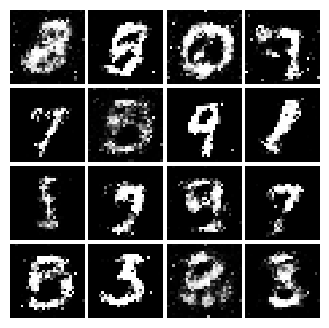


EPOCH:  9
Iter: 3750, D: 0.2026, G:0.1797


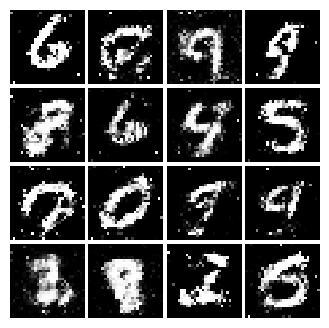


Iter: 4000, D: 0.2297, G:0.1448


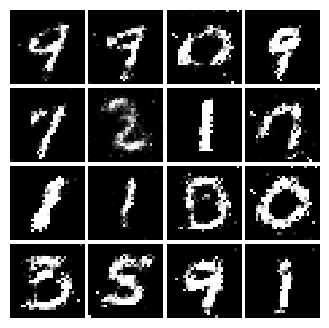


EPOCH:  10
Iter: 4250, D: 0.2182, G:0.1631


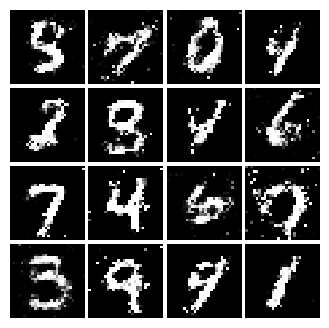


Iter: 4500, D: 0.2226, G:0.179


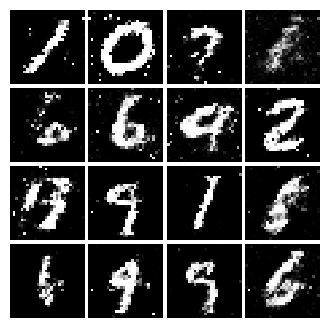

In [24]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)